In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler  
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from datetime import datetime
import matplotlib.pyplot as plt
from jupyterthemes import jtplot

## data preparation

In [25]:
input_dir = 'data/datasets'
types = ['static', 'temporal', 'merged']
datasets = ['email', 'sx']
look_around_values = ['la_0', 'la_1']
dataset_train_test = dict() # dataset -> (X_train, y_train, X_test, y_test)

In [36]:
for t in types:
    for dataset in datasets:
        for la in look_around_values:
            read_from_dir = '{0}/{1}/{2}/{3}'.format(input_dir, t, dataset, la)
            
            df_train = pd.read_csv('{0}/train.csv'.format(read_from_dir), header=None)
            df_test = pd.read_csv('{0}/test.csv'.format(read_from_dir), header=None)
            
            X_train = df_train.drop(columns=[df_train.columns[-1]])
            y_train = df_train[df_train.columns[-1]]
            X_test = df_test.drop(columns=[df_test.columns[-1]])
            y_test = df_test[df_test.columns[-1]]
            
            scaler = StandardScaler() 
            scaler.fit(X_train)  
            X_train = scaler.transform(X_train)  
            X_test = scaler.transform(X_test)  

            dataset_train_test[read_from_dir] = (X_train, y_train, X_test, y_test)

## support vector machine

In [37]:
svm_params = {'C': [2**i for i in range(-4, 6, 2)], 'gamma': [2**i for i in range(-3, -11, -2)]}
svm_accuracy = dict()

In [40]:
for dataset, (X_train, y_train, X_test, y_test) in dataset_train_test.items():
    print('Processing: {0}\t[{1}]'.format(dataset, datetime.now()))
    
    clf = GridSearchCV(svm.SVC(), svm_params, cv=10, n_jobs=4)
    clf.fit(X = X_train, y = y_train)

    clf = clf.best_estimator_
    y_pred = clf.predict(X_test)
    
    accuracy = round(accuracy_score(y_test, y_pred), 5)
    
    svm_accuracy[dataset] = accuracy
    print(accuracy)
    print(confusion_matrix(y_test, y_pred))
    print()

Processing: data/datasets/static/email/la_0	[2019-02-18 11:47:53.367075]
0.57431
[[51 11 38  4]
 [ 3 70 19 12]
 [ 7  8 69  3]
 [10 18 36 38]]

Processing: data/datasets/static/email/la_1	[2019-02-18 11:48:19.957496]
0.7783
[[90  3 14  0]
 [ 0 88 13  6]
 [13  5 86  0]
 [12 14 14 66]]

Processing: data/datasets/static/sx/la_0	[2019-02-18 11:48:41.999733]
0.78171
[[178   1   0 231]
 [  0 410   0   0]
 [  0   0 410   0]
 [115  11   0 284]]

Processing: data/datasets/static/sx/la_1	[2019-02-18 11:52:52.405764]
0.78545
[[146   0   0 263]
 [  0 409   0   0]
 [  0   0 409   0]
 [ 85   3   0 321]]

Processing: data/datasets/temporal/email/la_0	[2019-02-18 11:55:17.846804]
0.42821
[[21 15 40 28]
 [11 32 22 39]
 [ 8  6 71  2]
 [10  8 38 46]]

Processing: data/datasets/temporal/email/la_1	[2019-02-18 11:55:43.894140]
0.55896
[[32 22 18 35]
 [17 68 10 12]
 [ 7  5 92  0]
 [28 13 20 45]]

Processing: data/datasets/temporal/sx/la_0	[2019-02-18 11:56:08.923362]
0.73537
[[141  11   1 257]
 [  1 409   0 

## random forests

In [46]:
rf_params = {'n_estimators': [50, 100, 200, 400], 'max_depth': [2, 4, 6]}
rf_accuracy = dict()

In [47]:
for dataset, (X_train, y_train, X_test, y_test) in dataset_train_test.items():
    print('Processing: {0}\t[{1}]'.format(dataset, datetime.now()))
    
    clf = GridSearchCV(RandomForestClassifier(), rf_params, cv=10, n_jobs=4)
    clf.fit(X = X_train, y = y_train)

    clf = clf.best_estimator_
    y_pred = clf.predict(X_test)
    
    accuracy = round(accuracy_score(y_test, y_pred), 5)
    
    rf_accuracy[dataset] = accuracy
    print(accuracy)
    print(confusion_matrix(y_test, y_pred))
    print()

Processing: data/datasets/static/email/la_0	[2019-02-18 12:22:33.332232]
0.58438
[[50 14 15 25]
 [ 1 87 11  5]
 [ 4 21 35 27]
 [15 21  6 60]]

Processing: data/datasets/static/email/la_1	[2019-02-18 12:22:53.050754]
0.73113
[[85  5 13  4]
 [ 0 90 11  6]
 [ 7 18 76  3]
 [14 19 14 59]]

Processing: data/datasets/static/sx/la_0	[2019-02-18 12:23:13.786299]
0.79878
[[190   0   0 220]
 [  0 410   0   0]
 [  0   0 410   0]
 [109   1   0 300]]

Processing: data/datasets/static/sx/la_1	[2019-02-18 12:23:50.646273]
0.7934
[[118   0   0 291]
 [  0 409   0   0]
 [  0   0 409   0]
 [ 47   0   0 362]]

Processing: data/datasets/temporal/email/la_0	[2019-02-18 12:24:29.928510]
0.50378
[[32 18 34 20]
 [ 9 62 18 15]
 [ 7 17 63  0]
 [ 3 21 35 43]]

Processing: data/datasets/temporal/email/la_1	[2019-02-18 12:24:53.088571]
0.61792
[[39 20 17 31]
 [11 76  9 11]
 [10  6 86  2]
 [19 13 13 61]]

Processing: data/datasets/temporal/sx/la_0	[2019-02-18 12:25:17.942073]
0.76037
[[ 96   5   0 309]
 [ 11 399   0 

## xgboost

In [48]:
xgb_params = {'n_estimators': [50, 100, 200, 400], 'max_depth': [2, 4, 6]}
xgb_accuracy = dict()

In [49]:
for dataset, (X_train, y_train, X_test, y_test) in dataset_train_test.items():
    print('Processing: {0}\t[{1}]'.format(dataset, datetime.now()))
    
    clf = GridSearchCV(xgb.XGBClassifier(), rf_params, cv=10, n_jobs=4)
    clf.fit(X = X_train, y = y_train)

    clf = clf.best_estimator_
    y_pred = clf.predict(X_test)
    
    accuracy = round(accuracy_score(y_test, y_pred), 5)
    
    xgb_accuracy[dataset] = accuracy
    print(accuracy)
    print(confusion_matrix(y_test, y_pred))
    print()

Processing: data/datasets/static/email/la_0	[2019-02-18 12:30:25.353052]


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.56927
[[55 12 15 22]
 [ 7 77  9 11]
 [ 9 11 54 13]
 [17 25 20 40]]

Processing: data/datasets/static/email/la_1	[2019-02-18 12:31:34.626789]


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.76179
[[88  4 14  1]
 [ 1 92  9  5]
 [16  7 80  1]
 [17 13 13 63]]

Processing: data/datasets/static/sx/la_0	[2019-02-18 12:32:49.745892]


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.85061
[[245   0   0 165]
 [  6 404   0   0]
 [  0   0 410   0]
 [ 74   0   0 336]]

Processing: data/datasets/static/sx/la_1	[2019-02-18 12:37:16.001882]


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.89487
[[283   0   0 126]
 [  3 406   0   0]
 [  0   0 409   0]
 [ 43   0   0 366]]

Processing: data/datasets/temporal/email/la_0	[2019-02-18 12:42:04.669127]


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.48615
[[36 17 26 25]
 [16 57 14 17]
 [ 8 15 60  4]
 [12 18 32 40]]

Processing: data/datasets/temporal/email/la_1	[2019-02-18 12:44:46.714269]


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.61792
[[49 15 15 28]
 [ 9 80  9  9]
 [14 16 71  3]
 [18 13 13 62]]

Processing: data/datasets/temporal/sx/la_0	[2019-02-18 12:47:40.422771]


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.81646
[[213   3   0 194]
 [ 16 394   0   0]
 [  0   0 410   0]
 [ 83   5   0 322]]

Processing: data/datasets/temporal/sx/la_1	[2019-02-18 12:56:58.464949]


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.88081
[[287   0   0 122]
 [  7 402   0   0]
 [  0   0 409   0]
 [ 65   1   0 343]]

Processing: data/datasets/merged/email/la_0	[2019-02-18 13:04:45.243653]


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.57431
[[57 14 14 19]
 [10 72  9 13]
 [10 18 50  9]
 [17 18 18 49]]

Processing: data/datasets/merged/email/la_1	[2019-02-18 13:07:30.487731]


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.75236
[[85  6  7  9]
 [ 6 90  4  7]
 [13 14 77  0]
 [12 18  9 67]]

Processing: data/datasets/merged/sx/la_0	[2019-02-18 13:10:48.053995]


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.86951
[[269   0   0 141]
 [  6 404   0   0]
 [  0   0 410   0]
 [ 67   0   0 343]]

Processing: data/datasets/merged/sx/la_1	[2019-02-18 13:21:15.456499]
0.9132
[[319   0   0  90]
 [  2 407   0   0]
 [  0   0 409   0]
 [ 48   2   0 359]]



C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [149]:
plots = {'ds = email, ws = 1': ((svm_accuracy['data/datasets/static/email/la_0'], rf_accuracy['data/datasets/static/email/la_0'], xgb_accuracy['data/datasets/static/email/la_0']),
                             (svm_accuracy['data/datasets/temporal/email/la_0'], rf_accuracy['data/datasets/temporal/email/la_0'], xgb_accuracy['data/datasets/temporal/email/la_0']),    
                             (svm_accuracy['data/datasets/merged/email/la_0'], rf_accuracy['data/datasets/merged/email/la_0'], xgb_accuracy['data/datasets/merged/email/la_0'])),
         
          'ds = sx, ws = 1': ((svm_accuracy['data/datasets/static/sx/la_0'], rf_accuracy['data/datasets/static/sx/la_0'], xgb_accuracy['data/datasets/static/sx/la_0']),
                             (svm_accuracy['data/datasets/temporal/sx/la_0'], rf_accuracy['data/datasets/temporal/sx/la_0'], xgb_accuracy['data/datasets/temporal/sx/la_0']),
                             (svm_accuracy['data/datasets/merged/sx/la_0'], rf_accuracy['data/datasets/merged/sx/la_0'], xgb_accuracy['data/datasets/merged/sx/la_0'])),
         
          'ds = email, ws = 3': ((svm_accuracy['data/datasets/static/email/la_1'], rf_accuracy['data/datasets/static/email/la_1'], xgb_accuracy['data/datasets/static/email/la_1']),
                             (svm_accuracy['data/datasets/temporal/email/la_1'], rf_accuracy['data/datasets/temporal/email/la_1'], xgb_accuracy['data/datasets/temporal/email/la_1']),
                             (svm_accuracy['data/datasets/merged/email/la_1'], rf_accuracy['data/datasets/merged/email/la_1'], xgb_accuracy['data/datasets/merged/email/la_1'])),
         
          'ds = sx, ws = 3': ((svm_accuracy['data/datasets/static/sx/la_1'], rf_accuracy['data/datasets/static/sx/la_1'], xgb_accuracy['data/datasets/static/sx/la_1']),
                             (svm_accuracy['data/datasets/temporal/sx/la_1'], rf_accuracy['data/datasets/temporal/sx/la_1'], xgb_accuracy['data/datasets/temporal/sx/la_1']),
                             (svm_accuracy['data/datasets/merged/sx/la_1'], rf_accuracy['data/datasets/merged/sx/la_1'], xgb_accuracy['data/datasets/merged/sx/la_1']))
        }

In [191]:
jtplot.style(theme='onedork')
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')
jtplot.style(ticks=True, grid=False, figsize=(20, 13))
fig = plt.figure(figsize=(35, 35))

<Figure size 2520x2520 with 0 Axes>

## plotting

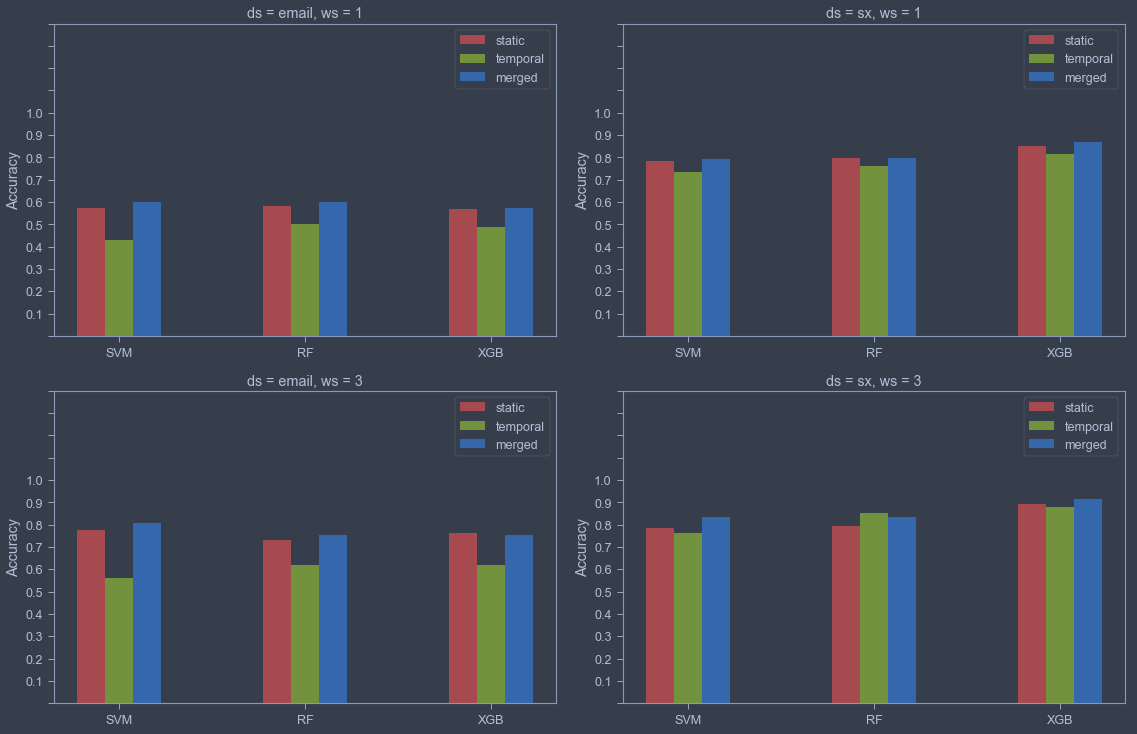

In [192]:
n_groups = 3
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8
models = ('SVM', 'RF', 'XGB')

for i, (description, (static, temporal, merged)) in enumerate(plots.items()):
    plt.subplot(2, 2, i+1)
    
    rects1 = plt.bar(index, static, bar_width, alpha=opacity, color='r', label='static')
    rects2 = plt.bar(index + bar_width, temporal, bar_width, alpha=opacity, color='g', label='temporal')
    rects3 = plt.bar(index + 2*bar_width, merged, bar_width, alpha=opacity, color='b', label='merged')

    plt.ylabel('Accuracy')
    plt.xticks(index + bar_width, models)
    y_ticks = ['']
    y_ticks.extend([round(x, 1) for x in np.arange(0.1, 1.01, 0.1)])
    plt.yticks(np.arange(0, 1.45, 0.1), y_ticks)
    plt.title(description)
    plt.legend()

plt.tight_layout()
plt.show()

# Wrap up
At last, the results.  

From the plots, we can confirm our hypothesis: for "sparse" temporal networks (ones that have fewer interactions between the nodes in a fixed time window) like the **E-mail** one, the method of windowing improved our model performance up to **20%**! This is because the process of motif construction in the network spans more than the defined time-frame so the windowing technique managed to capture more context from its predecessors.  
On the other hand, for "dense" temporal networks like the **StackExchange** one, the windowing technique had a modest improvement of **5-8%**. This is due to the fact that its motifs mostly occur in the specified time-window and only small amount of information can be extracted from the predecessor windows.  

Frankly, this was expected. Meaningful e-mail communication usually doesn't occur in just one day (the length of our time-frames), so that is why windowing the timeframes improved our accuracy so much - we were able to capture much more context of the communication between the employees in the department, thus increasing the number of motif formations.  
On the other hand, stack exchange discussions are rarely revisited after the day they were originally posted, so that is why we achieved such modest improvements by windowing the timeframes. 